Questions:

1. Read an image file into an array
2. Write an array into an image file
   Note: Make sure you can handle color and grayscale images
3. Change brightness of the image.
4. Change contrast of the image
5. Change a colour image to grayscale.
   Qn: Are there different ways of doing this? What is the visual effect of each?
6. Convert a grayscale image to color using a pseudo color mapping.
7. Read in an image with green screen for background and a second one for background. The function should
   replace the green screen with the corresponding pixels from the background image.
8. Read a video file and convert into an sequence (array) of images, and also to write it back as a video.
9. Create a 1 second transition video (fade, slide, any other) from one image to another.

1. Read an image file into an array

We need to read a image into an array. The array helps us to modify the values in it for various modifications for example to change brightness, contrast etc. 
NOTE: The array is in BGR format as CV2 reads in the BGR format. We convert it to RGB by using a temp variable which swaps the B with R  and R with B.

A colured 3 channel image is stored as a 3D matrix. Ploting the image. When comparing the image we find that the images are same.

(512, 512, 3)


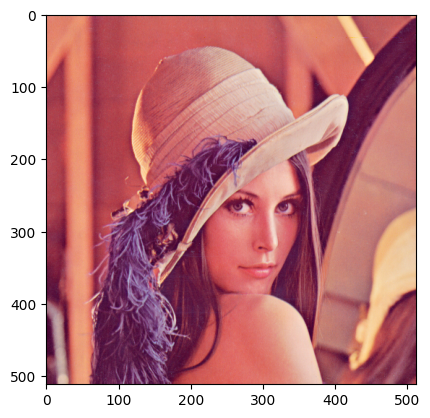

In [81]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lenna.png')
print(img.shape)

temp = img[:,:,0].copy()
img[:,:,0] = img[:,:,2]
img[:,:,2] = temp

plt.imshow(img)

2. Write an array into an image file
   Note: Make sure you can handle color and grayscale images

   We saved the function using imsave and converted the image to grey scale to check whether imsave can save gray scale imagwes

(512, 512)


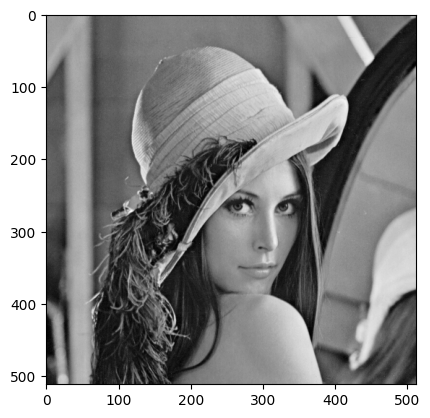

In [82]:
plt.imsave('./imgs/lenna_color.png', img)

img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)

print(img.shape)

plt.imsave('./imgs/lenna_gray.png', img, cmap='gray')
plt.imsave ('./imgs/lenna_gray2.png',img )
plt.imshow(img, cmap='gray')

3. Change brightness of the image.

This is a function to increase the brightness of an image. For this a function increase_brightness is made where we increase the brigthness by multiplying the increase with the numpy array. uint64 was used to prevent the overflow when mulpied but later it was clipped to keep it in the 8 bit range. Then the image is saved and displayed.

The general Equation for increasing brightness:

                                                I'(x,y) = k * I(x,y) 

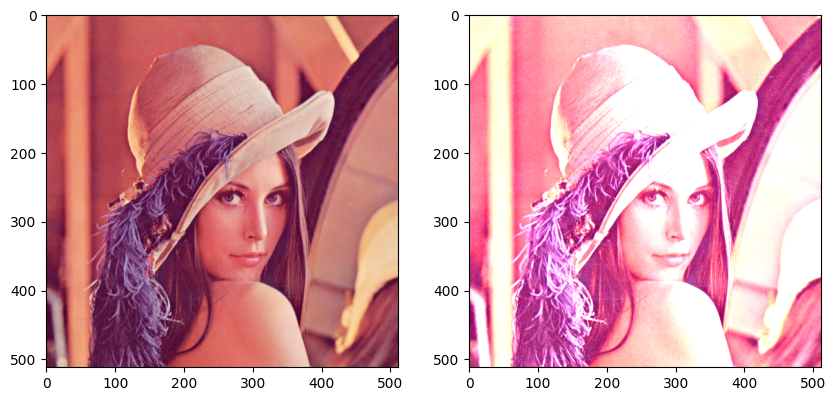

In [83]:
img = cv2.imread('lenna.png')
img = np.array(img)

temp = img[:,:,0].copy()
img[:,:,0] = img[:,:,2]
img[:,:,2] = temp

def increase_brightness(numpy_array, brightness_increase):
    numpy_array = numpy_array.astype('uint64')
    brightened_array = np.clip(numpy_array * brightness_increase, 0, 255).astype('uint8')
    return brightened_array

final = increase_brightness(img, 2)
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(final)

plt.imsave('./imgs/lenna_Brightness.png', final)


4. Change contrast of the image

The function adjusts the difference of each pixel from the mid-gray value of 128, amplifying or reducing it depending on the contrast factor.

(numpy_array - 128): This shifts the pixel values so that 128 becomes the "neutral" point. Positive values indicate pixels brighter than mid-gray, and negative values indicate pixels darker than mid-gray.

contrast_factor * (numpy_array - 128): This scales the difference from the neutral point 128. If contrast_factor is greater than 1, the differences will be amplified, making bright areas brighter and dark areas darker (increasing contrast). If contrast_factor is less than 1, the differences will be reduced.

128 +: After scaling the differences, this shifts the values back by adding 128 to each pixel, returning the pixel values to their original range.

-> To increase contrast, use a contrast_factor > 1.
-> To decrease contrast, use a contrast_factor between 0 and 1.
-> A contrast_factor of 1 will leave the image unchanged.


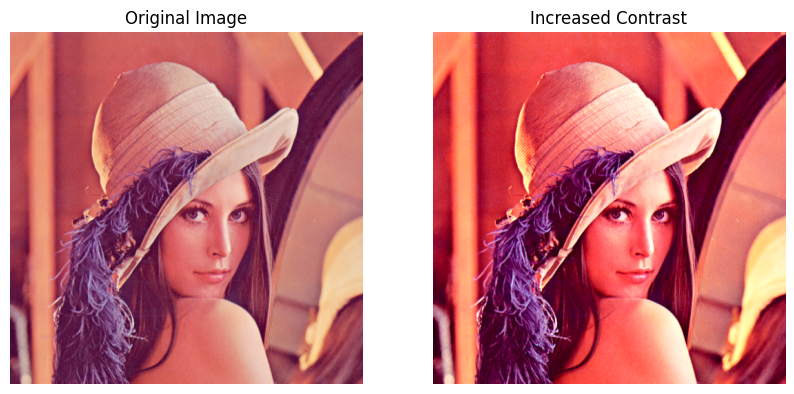

In [84]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lenna.png')
img = np.array(img)

temp = img[:,:,0].copy()
img[:,:,0] = img[:,:,2]
img[:,:,2] = temp

def increase_contrast(numpy_array, contrast_factor):
    
    numpy_array = numpy_array.astype(np.float32)
    contrasted_array = 128 + contrast_factor * (numpy_array - 128)
    contrasted_array = np.clip(contrasted_array, 0, 255).astype(np.uint8)
    return contrasted_array

final = increase_contrast(img, 1.5)    
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Increased Contrast')
plt.imshow(final)
plt.axis('off')

plt.show()

plt.imsave('./imgs/lenna_contrast.png', final)



Change a colour image to grayscale.
Qn: Are there different ways of doing this? What is the visual effect of each?

There are different ways to turn an image to greyscale some of them are:

->Averaging : Produces a balanced flat greyscale image.
  Visual Effect: The resulting grayscale image tends to look more balanced in terms of brightness

->Weighted Sum: Yields a natural high-contrast grayscale image.
  Visual Effect: The image will have better contrast and brightness perception. It make it feel more natural.

->Desaturation: Creates higher contrast with more dramatic light and dark regions.
  Visual Effect: The image can appear higher in contrast, with more pronounced highlights and shadows,
  
and many more depending on the use case.

Here we used Weighted Sum.

Lastly, Single Channel Extraction converts the image using just one color channel, leading to variations in brightness or darkness depending on the chosen channel.


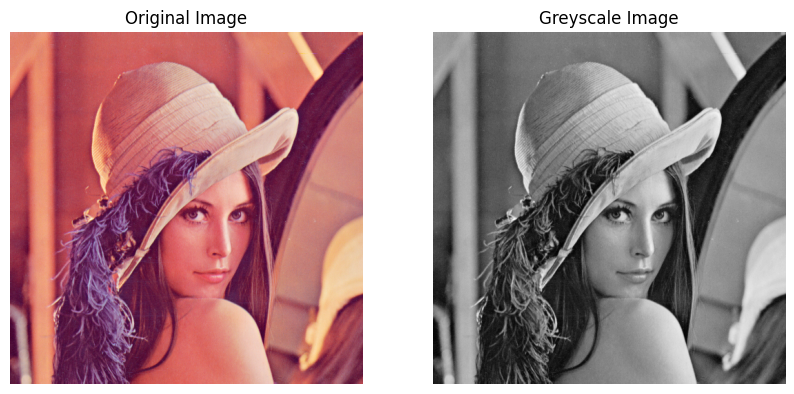

In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lenna.png')
img = np.array(img)

temp = img[:,:,0].copy()
img[:,:,0] = img[:,:,2]
img[:,:,2] = temp


final = (0.299*img[:,:,0]+0.587*img[:,:,1]+0.114*img[:,:,2])


plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Greyscale Image')
plt.imshow(final, cmap='gray')
plt.axis('off')

plt.show()

plt.imsave('./imgs/lenna_grey.png', final)

This function is wriiten only for comparision. The Psuedo colar image function made by me is in the next block.

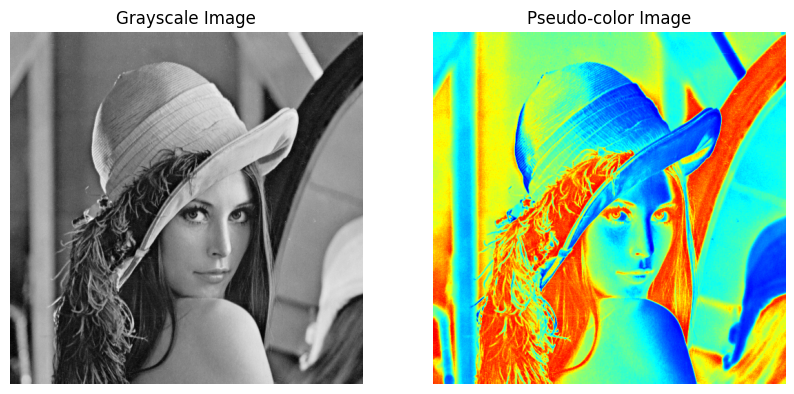

In [86]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lenna.png')
img = np.array(img)

temp = img[:,:,0].copy()
img[:,:,0] = img[:,:,2]
img[:,:,2] = temp


img_gray =  (0.299*img[:,:,0]+0.587*img[:,:,1]+0.114*img[:,:,2])

img_gray = img_gray.astype(np.uint8)

pseudo_color_img = cv2.applyColorMap(img_gray, cv2.COLORMAP_JET)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Grayscale Image')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Pseudo-color Image')
plt.imshow(pseudo_color_img)
plt.axis('off')

plt.show()


6. Convert a grayscale image to color using a pseudo color mapping.

Pseudo-color imaging is a technique used to map grayscale images (which have only intensity information) into color images to enhance the visualization of details and features that may not be easily distinguishable in the grayscale image.

The colors we need add depends on the use case.

Pseudo-color imaging assigns colors to these intensity values according to a predefined colormap. Different intensity levels are mapped to different colors, enhancing the visibility of features based on their brightness.

A colormap is a mapping from intensity values to RGB color values. This pseudo-color image now allows viewers to easily distinguish between different regions of intensity, making it much easier to analyze the image.


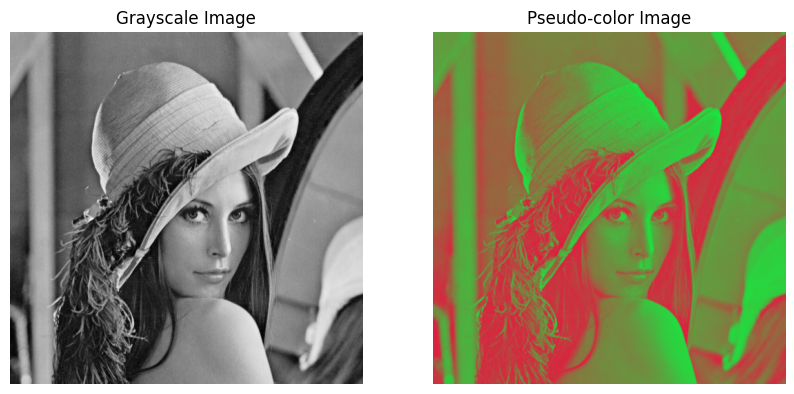

In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lenna.png')
img = np.array(img)

temp = img[:,:,0].copy()
img[:,:,0] = img[:,:,2]
img[:,:,2] = temp


img_gray =  (0.299*img[:,:,0]+0.587*img[:,:,1]+0.114*img[:,:,2])

normalized_gray = img_gray / 255.0

def custom_color_map(value):
    
    r = 1 - value
    g = value
    b = 0.25
    return (r, g, b)

pseudo_color_img = np.zeros((img_gray.shape[0], img_gray.shape[1], 3))

for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
        pseudo_color_img[i, j] = custom_color_map(normalized_gray[i, j])

pseudo_color_img = (pseudo_color_img * 255).astype(np.uint8)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Grayscale Image')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Pseudo-color Image')
plt.imshow(pseudo_color_img)
plt.axis('off')
plt.show()


7. Read in an image with green screen for background and a second one for background. The function should
replace the green screen with the corresponding pixels from the background image.

This code performs a green screen effect by replacing a specified background color in the foreground image with a new background image. It first loads both the foreground and the background images and swaps their Red and Blue channels to convert them from BGR to RGB format. It then checks if the dimensions of the images are compatible; if not, it prints a warning. Assuming compatibility, it crops the background image to match the dimensions of the foreground image. The change_background function creates a mask based on a color threshold to identify the background pixels in the foreground image and replaces them with corresponding pixels from the cropped background. Finally, it displays both the original and modified images using Matplotlib and saves the result as green_screen.png.

The function:
Create Mask: mask = img[:, :, 1] > threshold identifies pixels in the foreground image where the green channel value exceeds the threshold, marking them as background.

Expand Mask: mask = np.repeat(mask[:, :, np.newaxis], 3, axis=2) converts the 2D mask into a 3D array to match the dimensions of the RGB image. The axis parameter specifies which axis of the array should be affected by an operation. 

Apply Background: img[mask] = back[mask] replaces the masked pixels in the foreground image with corresponding pixels from the background image.

(360, 640, 3)
(1600, 1068, 3)


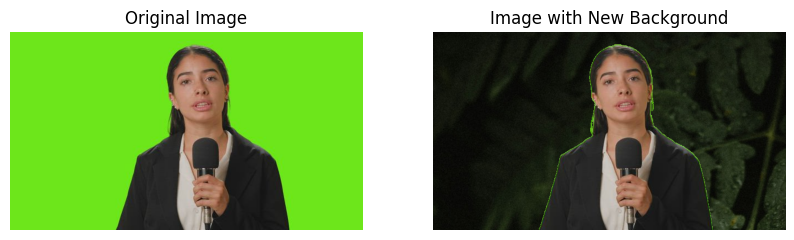

In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def change_background(img, back, threshold=210):
        mask = img[:, :, 1] > threshold
        
        mask = np.repeat(mask[:, :, np.newaxis], 3, axis=2)
        
        img[mask] = back[mask]

        return img

# Load and convert the images
img = cv2.imread('green_screen.jpg')
back = cv2.imread('test.jpg')

temp = img[:,:,0].copy()
img[:,:,0] = img[:,:,2]
img[:,:,2] = temp

original = img.copy()

temp = back[:,:,0].copy()
back[:,:,0] = back[:,:,2]
back[:,:,2] = temp

print(img.shape)
print(back.shape)

if(img.shape[0] > back.shape[0] and img.shape[1] > back.shape[1]):
    print("Sizes are not compatible")

else:
    
    #foreground = cv2.resize(img, (640, 360))
    #background = cv2.resize(back, (640, 360))

    cropped_image = back[0:img.shape[0], 0:img.shape[1]]

    foreground = img
    background = cropped_image

    final = change_background(foreground, background)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Image with New Background')
    plt.imshow(final)
    plt.axis('off')

    plt.show()

    plt.imsave('./imgs/green_screen.png', final)


8.Read a video file and convert into an sequence (array) of images, and also to write it back as a video.

This is done two seperate code blocks.

Directory Creation: It first checks if a directory named "frames" exists, and creates it if it does not.

Video Reading: It opens the video file (test_video.mp4) and initializes a list to store frames and a counter for frame numbers.

Frame Extraction: In a loop, it reads frames from the video until no more frames are available. Each frame is appended to the list and saved as a PNG file in the "frames" directory with filenames like frame_0001.png, frame_0002.png, etc.
It basically keeps track of each frame.

ret: A boolean indicating if the frame was successfully read. It is True if a frame was successfully read, and False if the end of the video file has been reached or if an error occurred.

In [89]:
import cv2
import os

if not os.path.exists("frames"):
    os.makedirs("frames")

cap = cv2.VideoCapture( "test_video.mp4")

frame_list = []
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame_list.append(frame)
    frame_count += 1
    frame_vedio = f"frames/frame_{frame_count:04d}.png"
    cv2.imwrite(frame_vedio, frame)

cap.release()


This script reconstructs a video from a sequence of PNG images stored in the "frames" directory from the previous cell. It starts by listing and sorting the PNG files, then reads the first image to determine the video dimensions. Using OpenCV’s cv2.VideoWriter, it sets up the video output with a frame rate of 30 FPS and the appropriate size. The script iterates through the sorted list of image files, reading and writing each frame to the video file. Once all frames are processed, it releases the VideoWriter.
The fps is an approximation.If there aren't enough frames to create a complete video, the script will still run, but the resulting video might have issues.

First we intialize the videowriter to later fill it with the frames .
Read Frame: cv2.imread(os.path.join("frames", frame_file)) reads each frame image file from the "frames" directory and loads it into the frame variable as a NumPy array.
Write Frame: out.write(frame) writes the frame to the video file. This stitches the frames together.


In [90]:
import cv2
import os

frame_files = sorted([f for f in os.listdir("frames") if f.endswith(".png")])

first_frame = cv2.imread(os.path.join("frames", frame_files[0]))
height, width, layers = first_frame.shape
size = (width, height)
fps = 30  

out = cv2.VideoWriter("output_video.mp4", cv2.VideoWriter_fourcc(*'mp4v'), fps, size)

for frame_file in frame_files:
    frame = cv2.imread(os.path.join("frames", frame_file))
    out.write(frame)

out.release()


9. Create a 1 second transition video (fade, slide, any other) from one image to another.

Read and Resize Images: It loads two images (lenna.png and test.jpg), and resizes the second image to match the dimensions of the first image.

Set Up Video Writer: Initializes a cv2.VideoWriter object to create a video file named transition_video.mp4 with 30 FPS and the same size as the images.

Generate Frames: Iterates over a calculated number of frames for a 3-second video. For each frame, it calculates a weighted average of the two images based on the current frame index (t), creating a smooth transition effect.

Write Frames: Converts the interpolated frame to an 8-bit format and writes it to the video file.

The equation used to control how the pictures transition:

                                        frame = (1 - t) * image1 + t * image2



In [91]:
import cv2
import numpy as np

# Read the two images

image1 = cv2.imread("lenna.png")
image2 = cv2.imread("test.jpg")


height, width, _ = image1.shape
image2 = cv2.resize(image2, (width, height))

fps = 30
duration =1  
total_frames = fps * duration

output_video_path = "transition_video.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

for n in range(total_frames + 1):
    t = n / total_frames  

    frame = (1 - t) * image1 + t * image2
    frame = frame.astype(np.uint8)  
    
    out.write(frame)

out.release()
